In [1]:
%run ./OpenFASOC/openfasoc/generators/glayout/gds_display.py.

In [2]:
%cd ./Differ_Amplifier/

c:\Users\ARF-DESIGN-CD7\open-source\Differ_Amplifier


c:\Users\ARF-DESIGN-CD7\anaconda3\envs\RajPandey\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [32]:
from glayout.flow.primitives.fet import pmos, nmos
from glayout.flow.pdk.util.comp_utils import evaluate_bbox
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.routing.straight_route import straight_route
from glayout.flow.routing.c_route import c_route
from gdsfactory import Component
from glayout.flow.pdk.gf180_mapped import gf180_mapped_pdk
from glayout.flow.blocks.current_mirror import current_mirror
from glayout.flow.routing.smart_route import smart_route


C:\Users\ARF-DESIGN-CD7\AppData\Local\Temp\ipykernel_13000\317094139.py:62: UserWarning: Unnamed cells, 7 in 'Unnamed_b8943ef6'
  diff_Amp (pdk=sky130).write_gds("diff_Amp.gds")
2024-08-08 18:13:51.710 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'diff_Amp.gds'


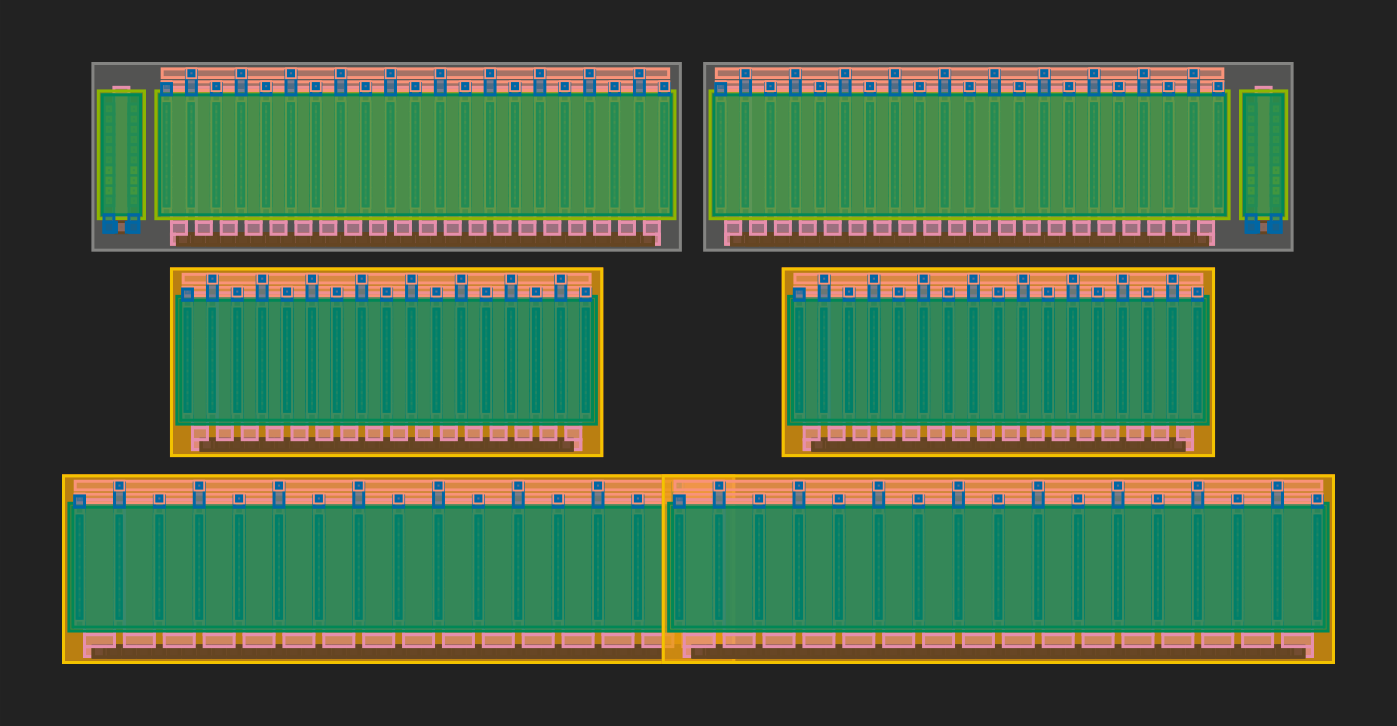

In [59]:
def diff_Amp(pdk: MappedPDK):
    diff_AmpComp = Component()
    
# PMOS
    pfet_pmos1 = pmos(pdk,length=0.50,width=4.00,fingers=20,with_dummy=[True,False],with_tie=False,with_substrate_tap=False)
    pfet_pmos2 = pmos(pdk,length=0.50,width=4.00,fingers=20,with_dummy=[False,True],with_tie=False,with_substrate_tap=False)

# # NMOS    
    nfet_nmos1 = nmos(pdk,length=1.00,width=4.00,fingers=16,with_tie=False,with_substrate_tap=False)
    nfet_nmos2 = nmos(pdk,length=1.00,width=4.00,fingers=16,with_tie=False,with_substrate_tap=False)
    nfet_nmos3 = nmos(pdk,length=0.50,width=4.00,fingers=16,with_tie=False,with_substrate_tap=False)
    nfet_nmos4 = nmos(pdk,length=0.50,width=4.00,fingers=16,with_tie=False,with_substrate_tap=False)
    
    cpmos1_pmos = diff_AmpComp << pfet_pmos1
    cpmos2_pmos = diff_AmpComp << pfet_pmos2
    
    cnmos1_nmos = diff_AmpComp << nfet_nmos1
    cnmos2_nmos = diff_AmpComp << nfet_nmos2
    cnmos3_nmos = diff_AmpComp << nfet_nmos3
    cnmos4_nmos = diff_AmpComp << nfet_nmos4

    pdk.util_max_metal_seperation()
    
    #VSS
    def evaluate_bbox(component):
        return (0,5)
    bbox_value = evaluate_bbox(nfet_nmos1)[0]
    cnmos1_nmos.movex(bbox_value + pdk.util_max_metal_seperation())
    
    def evaluate_bbox(component):
        return (20,30)
    bbox_value = evaluate_bbox(nfet_nmos2)[0]
    cnmos2_nmos.movex(bbox_value + pdk.util_max_metal_seperation())
    
    #Middle Layer
    def evaluate_bbox(component):
        return (8,6.5)
    bbox_value = evaluate_bbox(nfet_nmos3)[1]
    cnmos3_nmos.movey(bbox_value + pdk.util_max_metal_seperation())
    
    def evaluate_bbox(component):
        return (20,6.5)
    bbox_value = evaluate_bbox(nfet_nmos4)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cnmos4_nmos.move((x_offset + pdk.util_max_metal_seperation(), y_offset + pdk.util_max_metal_seperation()))

    #VDD
    def evaluate_bbox(component):
        return (0,13.35)
    bbox_value = evaluate_bbox(pfet_pmos1)[1]
    cpmos1_pmos.movey(bbox_value + pdk.util_max_metal_seperation())
    
    def evaluate_bbox(component):
        return (20,13.35)
    bbox_value = evaluate_bbox(pfet_pmos2)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cpmos2_pmos.move((x_offset + pdk.util_max_metal_seperation(),y_offset + pdk.util_max_metal_seperation()))
    
    return diff_AmpComp
diff_Amp (pdk=sky130).write_gds("diff_Amp.gds")
display_gds("diff_Amp.gds")
    
    
    